This notebook is set up to be used with Python 3(.6+). Also to properly run this notebook the following libraries need to be installed:
- `pip install matplotlib`
- `pip install numpy`
- `pip install pandas`
- `pip install nixio==1.5.0b4`


In [5]:
# First lets check which files are available to us in the general and in the excercise folder
import os

os.listdir()

['2020_RDM_course_nix_excercise_solved.ipynb',
 'runtime.txt',
 'excercise',
 'requirements.txt',
 'resources',
 '2020_RDM_course_nix.ipynb',
 'Exercise.nix',
 '.ipynb_checkpoints']

In [6]:
os.listdir("./excercise")

['20121202Pflp178GCaMP5kN2shift_210421W2bag.log',
 '20121202Pflp178GCaMP5kN2shift_210421W1bag.log',
 'README.md',
 '20121205Pflp178GCaMP5kN2shift_210421W4bag.log']

In [7]:
# Use the pandas library to read in columns from CSV files
import pandas as pd

In [8]:
# The raw data files do not provide column headers so we'll write them first.
#   Check the "README.md" files for details.
col_names = ["current_frame", "time_elapsed", "obj_substracted", "substracted_value", "obj_value", "obj_size", "background_value", "x_old", "y_old"]

In [9]:
# Read the content of the first file.
content = pd.read_csv("./excercise/20121202Pflp178GCaMP5kN2shift_210421W1bag.log", header=None, names=col_names)

In [10]:
# Briefly check the content
content

,current_frame,time_elapsed,obj_substracted,substracted_value,obj_value,obj_size,background_value,x_old,y_old
0,2,100,562645.0,103971.0,666616.0,225,462.093,131,104
1,3,200,557944.0,101495.0,659439.0,224,453.102,131,104
2,4,300,552561.0,99455.9,652017.0,220,452.072,131,104
3,5,400,548347.0,98163.5,646510.0,220,446.198,131,104
4,6,500,543663.0,96318.0,639981.0,218,441.826,131,104
...,...,...,...,...,...,...,...,...,...
6194,6196,620511,254501.0,39819.4,294320.0,138,288.547,288,101
6195,6197,620611,255895.0,40211.3,296106.0,140,287.223,288,101
6196,6198,620711,252538.0,39373.5,291911.0,137,287.398,288,101
6197,6199,620811,247750.0,38085.9,285836.0,133,286.360,288,101


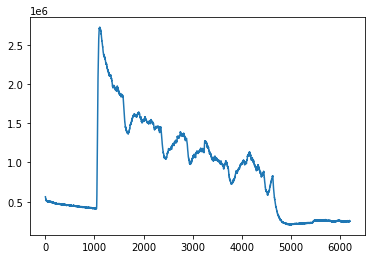

In [11]:
# Plot raw data to get a general idea how it looks like
import matplotlib.pyplot as plot

x = content["current_frame"]
y = content["obj_substracted"]
plot.plot(x,y)
plot.show()

Now we are set
- create a NIX file and a Block in it.
- create a DataArray for each raw data file and transfer the data of one of the columns.
- properly add Dimensions, labels and units.
- plot the data from the data stored in the NIX file.
- add meaningful metadata to the general NIX file and the individual DataArrays from information found in the README.md.
- connect all three DataArrays via a MultiTag. You can use the shift paradim as a reference or come up with your own points of interest.
- Plot the data using the MultiTag.
- If you work with Binder, make sure you regularly download the notebook to your local machine.

In [12]:
# Create a new, writeable NIX file. Don't forget to close it when you are done.
import nixio


In [13]:
f = nixio.File.open("Exercise.nix", nixio.FileMode.Overwrite)


In [14]:
# Create a Block to store Data in, use an appropriate naming and type scheme.
block = f.create_block(name="calcium_data", type_="raw_data")


In [15]:
# Create a DataArray on the block with the already loaded data above.
#  Again use appropriate naming and type, label and unit.
#  Make sure you can identify the corresponding data later on.
da_A = block.create_data_array(name="20121202W1_BAG", array_type="Pflp178GCaMP5kN2", data=content["obj_substracted"])
da_A.label = "Fluorescence"
da_A.unit = "AU"


In [16]:
# Add the appropriate two dimensions to the DataArray.
dim = da_A.append_sampled_dimension(100)
dim.label = "time"
dim.unit = "ms"

dim_set = da_A.append_set_dimension()


Text(0.5, 1.0, '20121202W1_BAG/Pflp178GCaMP5kN2')

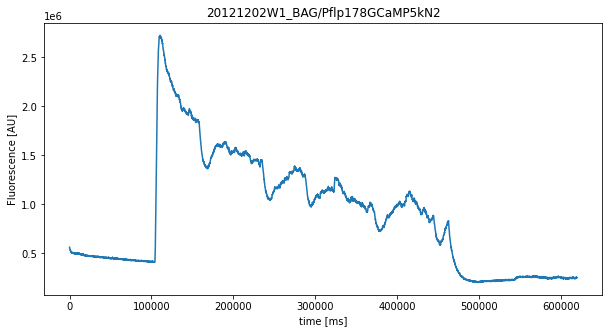

In [17]:
# Plot data from the DataArray and compare to the plot above.
import matplotlib.pyplot as plot

plot_data = f.blocks['calcium_data'].data_arrays['20121202W1_BAG']

y = plot_data[:]
x = plot_data.dimensions[0].axis(y.shape[0])

plot.figure(figsize=(10,5))
plot.plot(x, y, '-')
plot.xlabel("%s [%s]" % (dim.label, dim.unit))
plot.ylabel("%s [%s]" % (plot_data.label, plot_data.unit))
plot.title("%s/%s" % (plot_data.name, plot_data.type))


In [18]:
# Add DataArrays for the other two data files as well.
cont_B = pd.read_csv("./excercise/20121202Pflp178GCaMP5kN2shift_210421W2bag.log", header=None, names=col_names)
cont_C = pd.read_csv("./excercise/20121205Pflp178GCaMP5kN2shift_210421W4bag.log", header=None, names=col_names)

y_B = cont_B["obj_substracted"]
y_C = cont_C["obj_substracted"]

da_B = block.create_data_array(name="20121202W2_BAG", array_type="Pflp178GCaMP5kN2", data=cont_B["obj_substracted"])
da_B.label = "Fluorescence"
da_B.unit = "AU"

dim = da_B.append_sampled_dimension(100)
dim.label = "time"
dim.unit = "ms"

dim_set = da_B.append_set_dimension()


da_C = block.create_data_array(name="20121205W4_BAG", array_type="Pflp178GCaMP5kN2", data=cont_C["obj_substracted"])
da_C.label = "Fluorescence"
da_C.unit = "AU"

dim = da_C.append_sampled_dimension(100)
dim.label = "time"
dim.unit = "ms"

dim_set = da_C.append_set_dimension()


In [19]:
# Create metadata Sections and Properties in the file to document general metadata e.g. Species and Hardware
sec_spec = f.create_section(name="species")

_ = sec_spec.create_property(name="name", values_or_dtype="C.Elegans")
_ = sec_spec.create_property(name="strain", values_or_dtype="N2")
_ = sec_spec.create_property(name="genetic_modification", values_or_dtype="Pflp178GCaMP5k")

In [20]:
# Create metadata Sections specific to the DataArrays, document metadata specific to the raw data 
#  and connect them to the appropriate DataArrays.
#  Where appropriate try to add units to the Property values via the "property.unit" method.
sec_exp = f.create_section(name="experiments")

subsec_A = sec_exp.create_section(name="20121202W2_BAG")

In [21]:
_ = subsec_A.create_property(name="protocol", values_or_dtype="cs01_shift 21-04-21")
_ = subsec_A.create_property(name="protocol_shift_times", values_or_dtype=[110, 360, 150])
_ = subsec_A.create_property(name="intensity", values_or_dtype="4000/400")

da_A.metadata = subsec_A


In [ ]:
# Try to access the saved metadata from the DataArrays

subsec_B = sec_exp.create_section(name="20121202W1_BAG")
_ = subsec_B.create_property(name="protocol", values_or_dtype="cs01_shift 21-04-21")
_ = subsec_B.create_property(name="protocol_shift_times", values_or_dtype=[110, 360, 150])
_ = subsec_B.create_property(name="intensity", values_or_dtype="4000/500")

da_B.metadata = subsec_B

subsec_C = sec_exp.create_section(name="20121205W4_BAG")
_ = subsec_C.create_property(name="protocol", values_or_dtype="cs01_shift 21-04-21")
_ = subsec_C.create_property(name="protocol_shift_times", values_or_dtype=[110, 360, 150])
_ = subsec_C.create_property(name="intensity", values_or_dtype="6200/500")

da_C.metadata = subsec_C


In [ ]:
p = da_C.metadata.props["protocol_shift_times"]


In [ ]:
p.unit = "[s]"

In [ ]:
f.close()